<a href="https://colab.research.google.com/github/YugalBirzare/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#using pandas library and 'read_csv' function to read BlackFriday csv file as file already formated for us from Kaggle
hotel_booking=pd.read_csv("/content/drive/MyDrive/Copy of Hotel Bookings.csv")
#examing head of BlackFriday csv file 
hotel_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#checking amount of rows and columns in given dataset to understand the size we are working with
hotel_booking.shape

(119390, 32)

In [ ]:
hotel_type=hotel_booking['hotel'].sort_values().unique()
print(hotel_type)
quantity=hotel_booking['hotel'].value_counts()
quantity

['City Hotel' 'Resort Hotel']


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

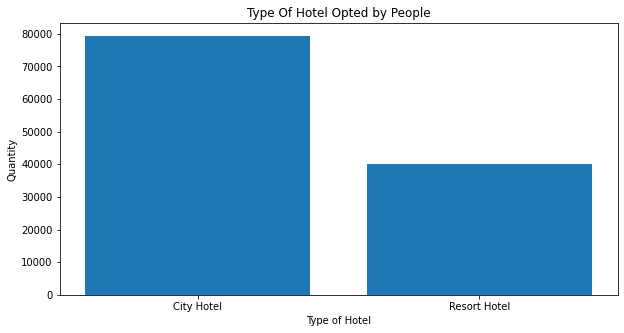

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x=hotel_type,height=quantity,label='Type of Hotel' )
plt.title('Type Of Hotel Opted by People')
plt.xlabel('Type of Hotel')
plt.ylabel('Quantity')
plt.show

In [ ]:
#Percentage of people stayed prefers the type of hotel
resort_hotel=(4006000/119390)
print(resort_hotel)
city_hotel=(7933000/119390)
print(city_hotel)



33.55389898651478
66.44610101348522


In [ ]:
#checking type of every column in the dataset
hotel_booking.dtypes


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Data Cleaning


In [ ]:
#rows containing duplicate data
duplicate_rows=hotel_booking[hotel_booking.duplicated()]
duplicate_rows.shape

(31994, 32)

In [ ]:
hotel_booking.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [ ]:
#removing duplicate datas
hotel_booking=hotel_booking.drop_duplicates()
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking.count()

hotel                             87396
is_canceled                       87396
lead_time                         87396
arrival_date_year                 87396
arrival_date_month                87396
arrival_date_week_number          87396
arrival_date_day_of_month         87396
stays_in_weekend_nights           87396
stays_in_week_nights              87396
adults                            87396
children                          87392
babies                            87396
meal                              87396
country                           86944
market_segment                    87396
distribution_channel              87396
is_repeated_guest                 87396
previous_cancellations            87396
previous_bookings_not_canceled    87396
reserved_room_type                87396
assigned_room_type                87396
booking_changes                   87396
deposit_type                      87396
agent                             75203
company                            5259


In [ ]:
#checking for null values
hotel_booking.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
#Replacing the Null Values
hotel_booking['company'].fillna(0,inplace=True)
hotel_booking['agent'].fillna(0,inplace=True)
hotel_booking['country'].fillna('other',inplace=True)
hotel_booking['children'].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#Checking any left null values
hotel_booking.isna().sum().sort_values()

hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
reservation_status                    0
distribution_channel                  0
reservation_status_date               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
market_segment                        0
is_canceled                           0
arrival_date_week_number              0


In [ ]:
hotel_booking.count()

hotel                             87396
is_canceled                       87396
lead_time                         87396
arrival_date_year                 87396
arrival_date_month                87396
arrival_date_week_number          87396
arrival_date_day_of_month         87396
stays_in_weekend_nights           87396
stays_in_week_nights              87396
adults                            87396
children                          87396
babies                            87396
meal                              87396
country                           87396
market_segment                    87396
distribution_channel              87396
is_repeated_guest                 87396
previous_cancellations            87396
previous_bookings_not_canceled    87396
reserved_room_type                87396
assigned_room_type                87396
booking_changes                   87396
deposit_type                      87396
agent                             87396
company                           87396


In [ ]:
hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
updated_hotel_booking=hotel_booking['hotel'].sort_values(ascending=True).unique()
print(updated_hotel_booking)
updated_quantity=hotel_booking['hotel'].value_counts()
print(updated_quantity)


['City Hotel' 'Resort Hotel']
City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

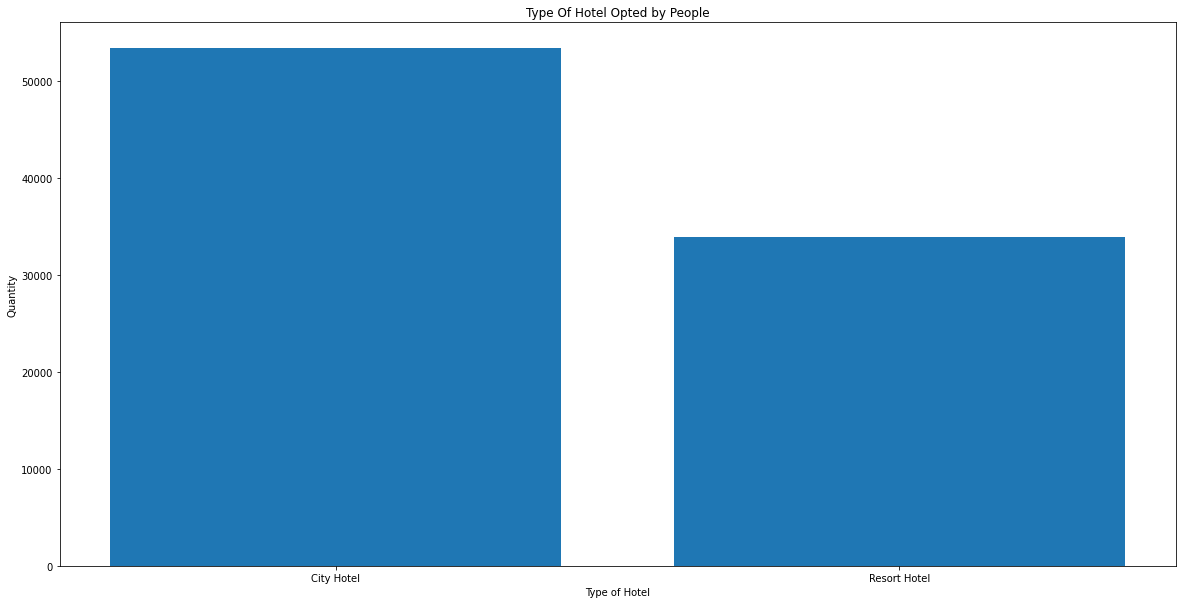

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(x=updated_hotel_booking,height=updated_quantity,label='Type of Hotel' )
plt.title('Type Of Hotel Opted by People')
plt.xlabel('Type of Hotel')
plt.ylabel('Quantity')
plt.show

In [ ]:
#Percentage of people stayed prefers the type of hotel after cleaning
updated_resort_hotel=(3396800/87396)
print(updated_resort_hotel)
updated_city_hotel=(5342800/87396)
print(updated_city_hotel)

38.86676735777381
61.13323264222619


<Figure size 2160x720 with 0 Axes>

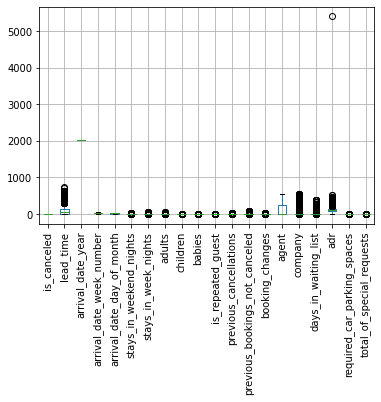

<Figure size 2160x720 with 0 Axes>

In [ ]:
#boxplot for seeing the ouliers
hotel_booking.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(30,10))



We can clearly see that we cannot see the boxplot of the individual variable
.Their are  many outlier which we cannot see it properly.


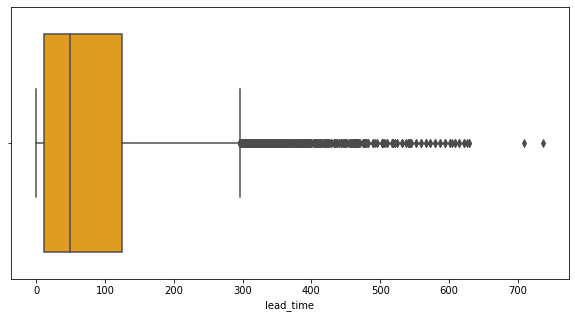

In [ ]:
#plotting boxplot to find outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=hotel_booking['lead_time'],color='orange')

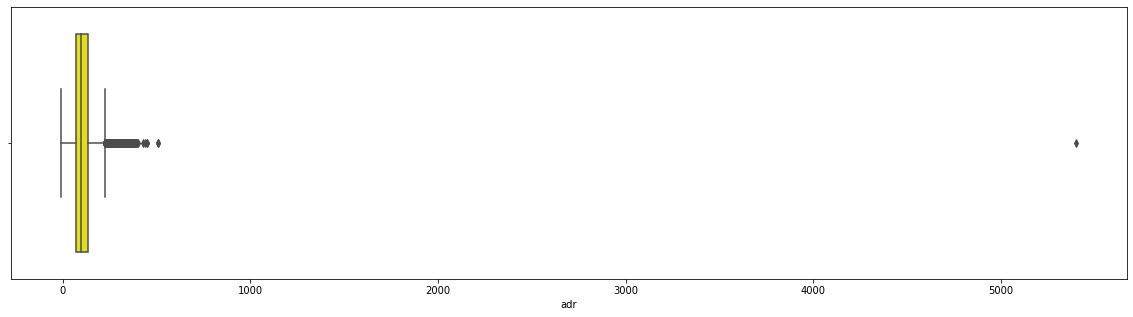

In [ ]:
#plotting boxplot to find outliers
plt.figure(figsize=(20,5))
sns.boxplot(x=hotel_booking['adr'],color='yellow')

In [ ]:
df=hotel_booking.groupby('arrival_date_month')
a=df['lead_time'].mean()
b=df['stays_in_weekend_nights'].mean()
c=df['stays_in_week_nights'].mean()
d=df['booking_changes'].mean()
e=df['days_in_waiting_list'].mean()
f=df['adr'].mean()
f=df['adr'].mean()
g=df['hotel'].sum()

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

arrival_date_month
April         75.855336
August       102.679133
December      58.997077
February      35.126927
January       34.463243
July         111.960127
June         103.982743
March         53.409024
May           92.169240
November      47.582983
October       82.922123
September     94.230942
Name: lead_time, dtype: float64
arrival_date_month
April        1.001517
August       1.147197
December     0.894562
February     0.921122
January      0.842745
July         1.208611
June         1.043142
March        0.863037
May          0.962657
November     0.851451
October      0.963369
September    1.068012
Name: stays_in_weekend_nights, dtype: float64
arrival_date_month
April        2.442337
August       3.019988
December     2.414149
February     2.282716
January      2.334754
July         3.002386
June         2.811333
March        2.534939
May          2.512867
November     2.478879
October      2.351168
September    2.709268
Name: stays_in_week_nights, dtype: float64
arriva

In [ ]:
#creating a grouby to see which month is busiest for hotel
busy_month=hotel_booking.groupby(['arrival_date_month','hotel']).lead_time.count()
busy_month

arrival_date_month  hotel       
April               City Hotel      5080
                    Resort Hotel    2828
August              City Hotel      6591
                    Resort Hotel    4666
December            City Hotel      3014
                    Resort Hotel    2117
February            City Hotel      3605
                    Resort Hotel    2493
January             City Hotel      2730
                    Resort Hotel    1963
July                City Hotel      5744
                    Resort Hotel    4313
June                City Hotel      5005
                    Resort Hotel    2760
March               City Hotel      4856
                    Resort Hotel    2657
May                 City Hotel      5413
                    Resort Hotel    2942
November            City Hotel      2942
                    Resort Hotel    2053
October             City Hotel      4208
                    Resort Hotel    2726
September           City Hotel      4240
                    Reso

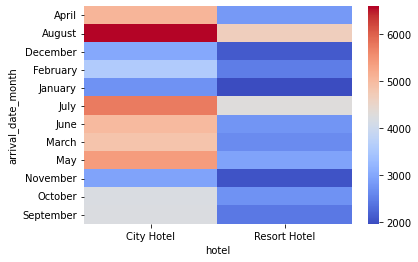

In [ ]:
#creating heatmap of the booking of type of hotel in every month
sns.heatmap(pd.crosstab(hotel_booking.arrival_date_month,hotel_booking.hotel),cmap='coolwarm')

In [ ]:
#creating groupby of how many time any type of hotel is canceled
df2=hotel_booking.groupby(['is_canceled','hotel']).lead_time.count().unstack()
df2

hotel,City Hotel,Resort Hotel
is_canceled,,
0,37379,25992
1,16049,7976


Text(0, 0.5, 'Amount of Canceled')

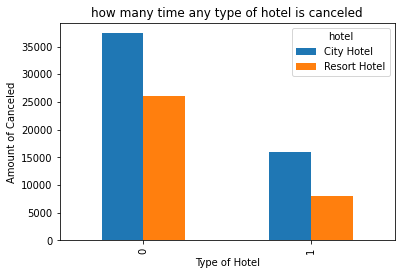

In [ ]:
#creating a bar graph to get the value of hotel canceled or not
df2.plot(kind="bar")
plt.title('how many time any type of hotel is canceled')
plt.xlabel('Type of Hotel')
plt.ylabel('Amount of Canceled')


In [ ]:
#creating groupby of how many deposit done at any type of hotel
df3=hotel_booking.groupby(['hotel','deposit_type']).lead_time.count().unstack()
df3

deposit_type,No Deposit,Non Refund,Refundable
hotel,,,
City Hotel,52568,845,15
Resort Hotel,33683,193,92


Text(0, 0.5, 'Deposit Type')

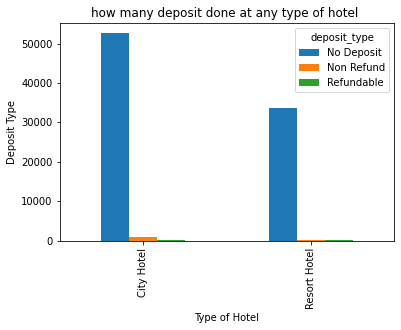

In [ ]:
#creating bar graph of how many deposit done at any type of hotel 
df3.plot(kind="bar")
plt.title('how many deposit done at any type of hotel ')
plt.xlabel('Type of Hotel')
plt.ylabel('Deposit Type')

In [ ]:
#creating groupby of how many time any type of hotel is canceled by reperated customer
df4=hotel_booking.groupby(['is_canceled','is_repeated_guest']).lead_time.count().unstack()
df4

is_repeated_guest,0,1
is_canceled,,
0,60217,3154
1,23764,261


Text(0, 0.5, 'Hotel canceled by repeated guest')

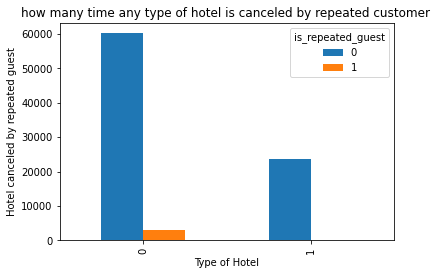

In [ ]:
#creating bar graph of how many time any type of hotel is canceled by repeated customer
 

In [ ]:
df5=hotel_booking.groupby(['days_in_waiting_list','market_segment']).lead_time.count().unstack()
df5

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
days_in_waiting_list,,,,,,,,
0,227.0,700.0,4182.0,11790.0,4538.0,13482.0,51615.0,2.0
1,NaN,NaN,2.0,1.0,4.0,5.0,NaN,NaN
2,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,1.0,NaN,NaN,3.0,11.0,NaN,NaN
...,...,...,...,...,...,...,...,...
236,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [ ]:
#creating groupby of market segment with type of hotel
df5=hotel_booking.groupby(['hotel','market_segment']).lead_time.count().unstack()
df5

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
hotel,,,,,,,,
City Hotel,227.0,513.0,2227.0,5559.0,2635.0,7271.0,34994.0,2.0
Resort Hotel,NaN,189.0,1985.0,6245.0,2307.0,6618.0,16624.0,NaN


Text(0, 0.5, 'days in waiting list')

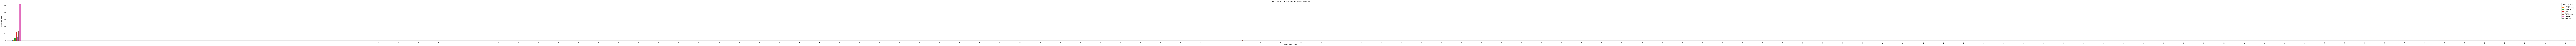

In [ ]:
#creating bar plot of market segment with type of hotel
df5.plot(kind="bar",figsize=(400,6))
plt.title('Type of market market segment with days in waiting list ')
plt.xlabel('Type of market segment')
plt.xticks(rotation=90)
plt.ylabel('days in waiting list')

In [ ]:
#creating groupby of distribution chanel with type of hotel
df6=hotel_booking.groupby(['hotel','distribution_channel']).lead_time.count().unstack()
df6

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
hotel,,,,,
City Hotel,2607.0,6087.0,181.0,44549.0,4.0
Resort Hotel,2474.0,6901.0,NaN,24592.0,1.0


Text(0, 0.5, 'Type of distribution channel')

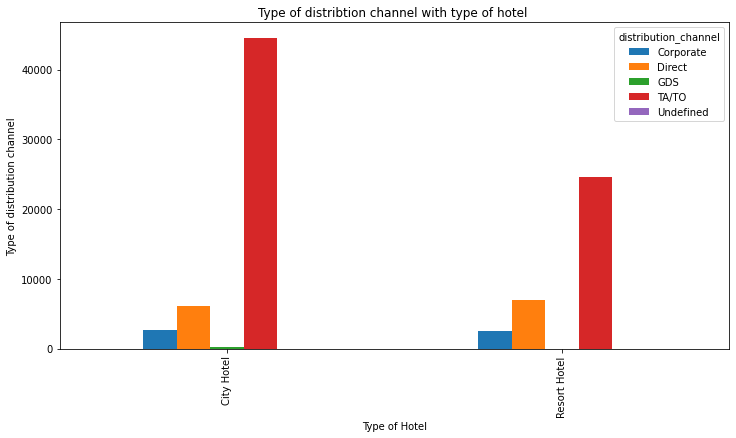

In [ ]:
#creating bar plot of distribution channel with type of hotel
df6.plot(kind="bar",figsize=(12,6))
plt.title('Type of distribtion channel with type of hotel ')
plt.xlabel('Type of Hotel')
plt.ylabel('Type of distribution channel')

In [ ]:
#creating correlation matrix to check speScial treatment
hotel_booking_df=hotel_booking[['total_of_special_requests','babies','children','adults']]
corr_df=hotel_booking_df.corr()
corr_df

,total_of_special_requests,babies,children,adults
total_of_special_requests,1.000000,0.094820,0.044596,0.112772
babies,0.094820,1.000000,0.017423,0.016640
children,0.044596,0.017423,1.000000,0.023712
adults,0.112772,0.016640,0.023712,1.000000


In [ ]:
#creating groupby of repeated guest with customer type
df7=hotel_booking.groupby(['is_repeated_guest','customer_type']).lead_time.count().unstack()
df7

customer_type,Contract,Group,Transient,Transient-Party
is_repeated_guest,,,,
0,3106,388,69050,11437
1,33,156,2936,290


Text(0, 0.5, 'Repeated guest')

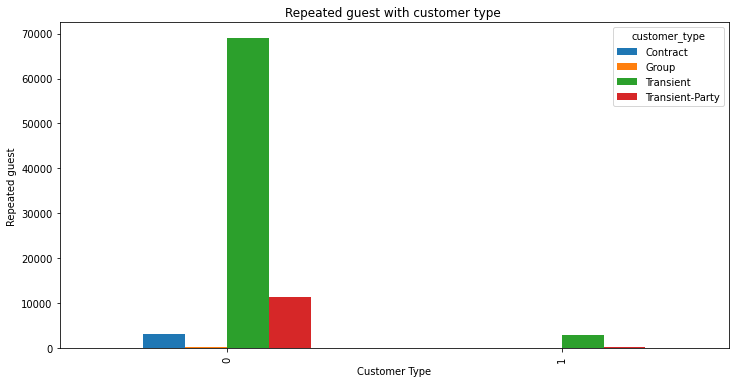

In [ ]:
#creating bar plot of repeated guest with customer type
df7.plot(kind="bar",figsize=(12,6))
plt.title('Repeated guest with customer type ')
plt.xlabel('Customer Type')
plt.ylabel('Repeated guest')

In [ ]:
#creating bar plot of Reservation Status according to Market Segment
df8=hotel_booking.groupby(['reservation_status','market_segment']).lead_time.count().unstack()
df8

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
reservation_status,,,,,,,,
Canceled,34.0,77.0,441.0,1557.0,1299.0,1888.0,17713.0,2.0
Check-Out,182.0,614.0,3702.0,10067.0,3607.0,11826.0,33373.0,NaN
No-Show,11.0,11.0,69.0,180.0,36.0,175.0,532.0,NaN


Text(0, 0.5, 'Type of market segment')

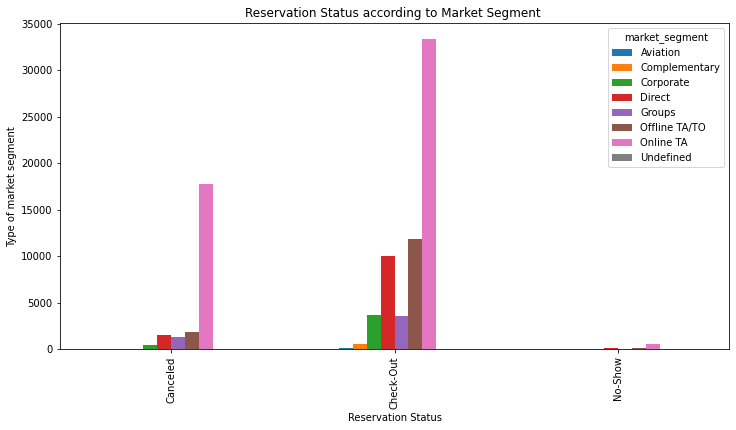

In [ ]:
#creating bar plot of Reservation Status according to Market Segment
df8.plot(kind="bar",figsize=(12,6))
plt.title('Reservation Status according to Market Segment ')
plt.xlabel('Reservation Status')
plt.ylabel('Type of market segment')

In [ ]:
df10=hotel_booking.groupby(['is_canceled','market_segment']).lead_time.count().unstack()
df10

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,182.0,614.0,3702.0,10067.0,3607.0,11826.0,33373.0,NaN
1,45.0,88.0,510.0,1737.0,1335.0,2063.0,18245.0,2.0


Text(0, 0.5, 'no. of canceled booking')

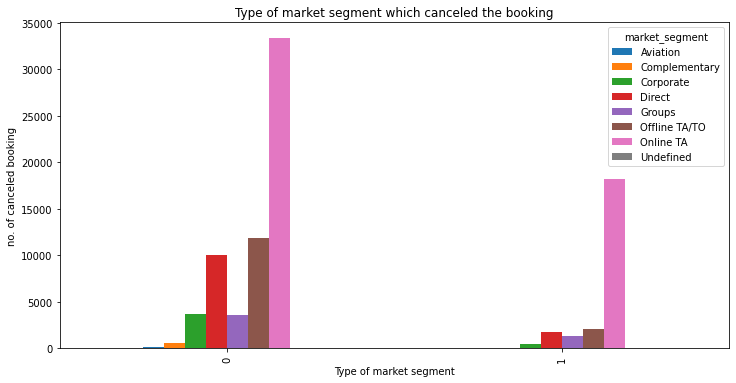

In [ ]:
df10.plot(kind="bar",figsize=(12,6))
plt.title('Type of market segment which canceled the booking')
plt.xlabel('Type of market segment')
plt.ylabel('no. of canceled booking')

<function matplotlib.pyplot.show(*args, **kw)>

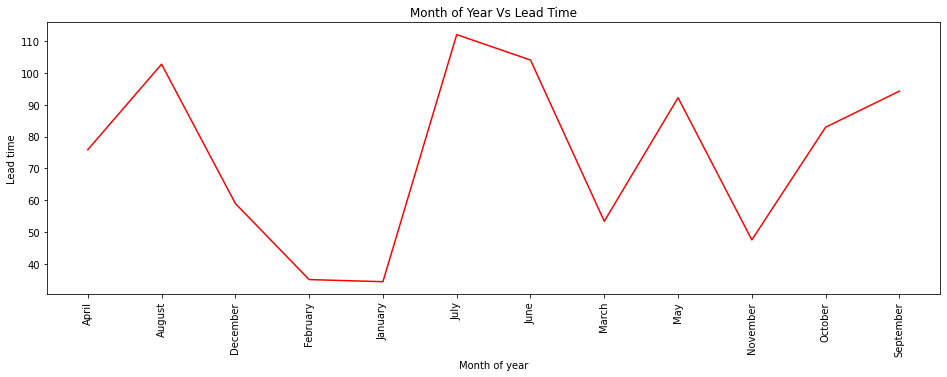

In [ ]:
#creating graph between Month of year and Lead time
plt.figure(figsize=(16,5))
plt.plot(a,color='r')
plt.xticks(rotation = 90)
plt.title('Month of Year Vs Lead Time')
plt.xlabel('Month of year')
plt.ylabel('Lead time')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

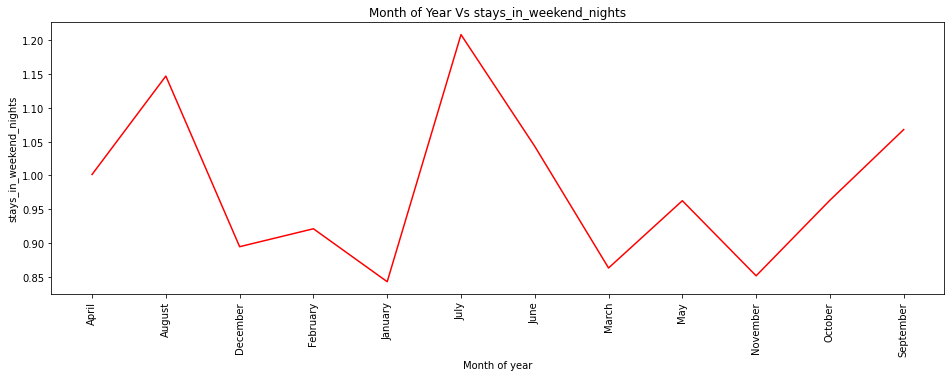

In [ ]:
#creating graph between Month of year and stays_in_weekend_nights
plt.figure(figsize=(16,5))
plt.plot(b,color='r')
plt.xticks(rotation = 90)
plt.title('Month of Year Vs stays_in_weekend_nights')
plt.xlabel('Month of year')
plt.ylabel('stays_in_weekend_nights')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

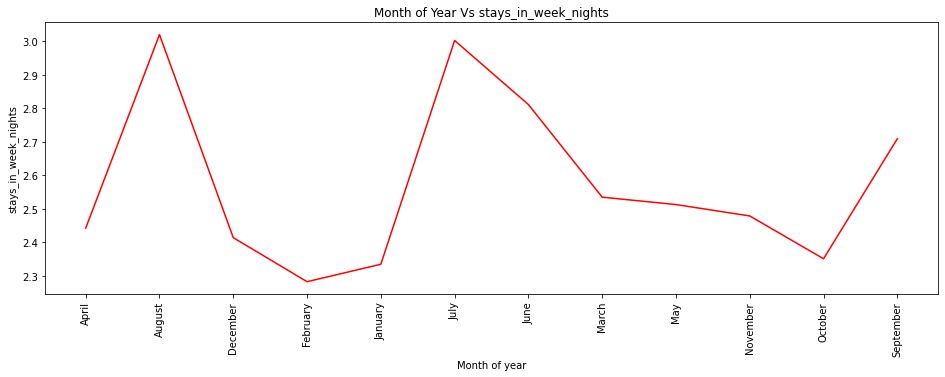

In [ ]:
#creating graph between Month of year and stays_in_week_nights
plt.figure(figsize=(16,5))
plt.plot(c,color='r')
plt.xticks(rotation = 90)
plt.title('Month of Year Vs stays_in_week_nights')
plt.xlabel('Month of year')
plt.ylabel('stays_in_week_nights')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

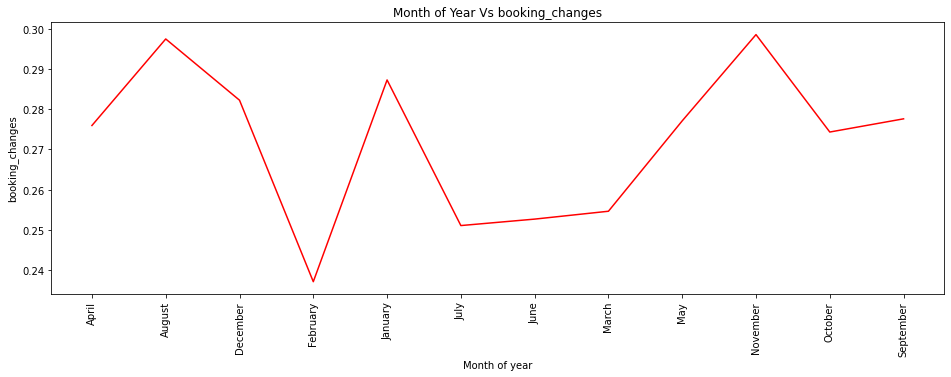

In [ ]:
#creating graph between Month of year and booking_changes
plt.figure(figsize=(16,5))
plt.plot(d,color='r')
plt.xticks(rotation = 90)
plt.title('Month of Year Vs booking_changes')
plt.xlabel('Month of year')
plt.ylabel('booking_changes')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

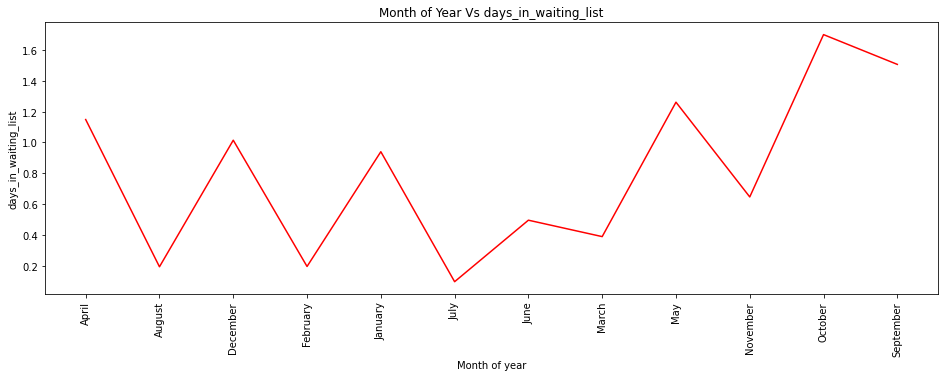

In [ ]:
#creating graph between Month of year and days_in_waiting_list'
plt.figure(figsize=(16,5))
plt.plot(e,color='r')
plt.xticks(rotation = 90)
plt.title('Month of Year Vs days_in_waiting_list')
plt.xlabel('Month of year')
plt.ylabel('days_in_waiting_list')
plt.show

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.184806,0.088030,0.001443,0.005328,0.060191,0.082928,0.081816,0.067369,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,-0.000900,-0.074758,0.004464,0.127986,-0.184206,-0.120545
lead_time,0.184806,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.080448,-0.079176,0.132152,0.023564,-0.086541,0.034240
arrival_date_year,0.088030,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,0.024343,-0.054212,0.027256,0.008604,-0.001891,0.021269,-0.027939,0.176088,-0.039807,0.064268
arrival_date_week_number,0.001443,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,-0.036860,0.007199,-0.020819,0.011902,0.019594,-0.022627,0.013843,0.098279,0.008946,0.046599
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.004178,-0.008538,0.000152,0.006307,0.006102,-0.000486,0.006588,0.022591,0.009167,-0.001651
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.106948,-0.020636,-0.056653,0.050316,0.158389,-0.090461,-0.031680,0.038972,-0.042920,0.032396
stays_in_week_nights,0.082928,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.190041,-0.065747,0.001905,0.053298,-0.044303,0.037823
adults,0.081816,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,0.029627,-0.174455,-0.015740,0.248999,0.007802,0.112772
children,0.067369,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.045651,-0.019208,-0.029423,0.031313,0.042034,-0.051048,-0.020419,0.326293,0.036332,0.044596
babies,-0.020543,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,-0.012977,-0.005395,-0.009193,0.081035,0.028949,-0.011428,-0.006840,0.023446,0.030885,0.094820


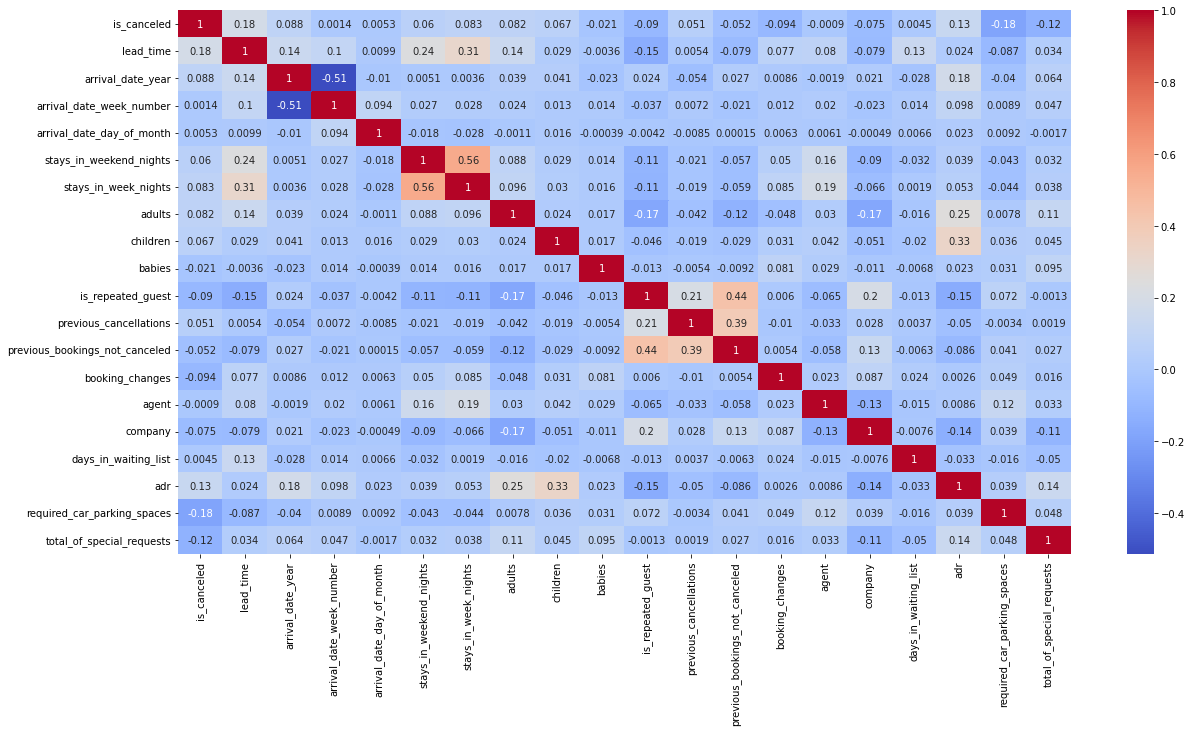

In [ ]:
#Heatmap of Whole Data Set
plt.figure(figsize=(20,10))
h=hotel_booking.corr()
sns.heatmap(h,cmap='coolwarm',annot=True)
h

EXPLORING DATA

In [ ]:
hotel_booking.shape

(87396, 32)

In [ ]:
#Total Cancelation in rows and columns
total_cancelation=hotel_booking['is_canceled'].sum()
print(total_cancelation)
row_cancelation=hotel_booking.loc[hotel_booking['hotel']=='Resort Hotel']['is_canceled'].sum()
print(row_cancelation)
column_cancelation=hotel_booking.loc[hotel_booking['hotel']=='City Hotel']['is_canceled'].sum()
print(column_cancelation)

24025
7976
16049


In [ ]:
#Calculating the percentage of cancelation
per_total_cancelation=total_cancelation/hotel_booking.shape[0] *100
print(per_total_cancelation)
per_row_cancelation=row_cancelation/hotel_booking.loc[hotel_booking['hotel']=='Resort Hotel'].shape[0] *100
print(per_row_cancelation)
per_column_cancelation=column_cancelation/hotel_booking.loc[hotel_booking['hotel']=='City Hotel'].shape[0] *100
print(per_column_cancelation)

27.489816467572886
23.480923221855864
30.03855656210227


In [ ]:
#creating groupby of how many time any type of hotel is canceled by reperated customer
df9=hotel_booking.groupby(['is_canceled','arrival_date_month','hotel']).lead_time.count().unstack()
df9

hotel                           City Hotel  Resort Hotel
is_canceled arrival_date_month                          
0           April                     3330          2169
            August                    4481          3153
            December                  2034          1719
            February                  2630          2053
            January                   1966          1689
            July                      3846          3013
            June                      3484          1927
            March                     3491          2192
            May                       3667          2246
            November                  2196          1745
            October                   3081          2211
            September                 3173          1875
1           April                     1750           659
            August                    2110          1513
            December                   980           398
            February                   975           440
            January                    764           274
            July                      1898          1300
            June                      1521           833
            March                     1365           465
            May                       1746           696
            November                   746           308
            October                   1127           515
            September                 1067           575

Text(0, 0.5, 'Cancelation')

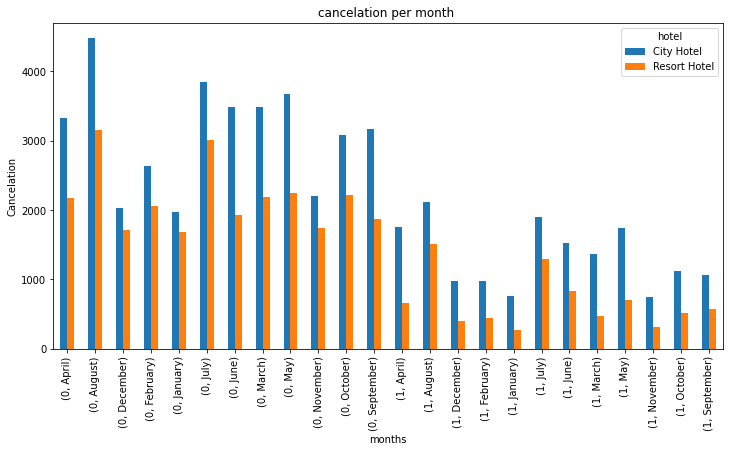

In [ ]:
#creating bar plot of cancelation per month
df9.plot(kind="bar",figsize=(12,6))
plt.title('cancelation per month ')
plt.xlabel('months')
plt.ylabel('Cancelation')

CONCLUSION



Around 60% bookings are for City hotel and 40% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel. Also the overall adr of City hotel is slightly higher than Resort hotel.

Mostly guests stay for less than 5 days in hotel and for longer stays Resort hotel is preferred.


Both hotels have significantly higher booking cancellation rates and very few guests less than 3 % return for another booking in City hotel. 5% guests return for stay in Resort hotel.

Guests use different channels for making bookings out of which most preferred way is TA/TO.

For hotels higher adr deals come via GDS channel, so hotels should increase their popularity on this channel.

Almost 55% of bookings via TA/TO are cancelled.

Not getting same room as reserved, longer lead time and waiting time do not affect cancellation of bookings. Although different room allotment do lowers the adr.

July- August are the most busier and profitable months for both of hotels. 

Within a month, adr gradually increases as month ends, with small sudden rise on weekends.

Couples are the most common guests for hotels, hence hotels can plan services according to couples needs to increase revenue.

More number of people in guests results in more number of special requests.

Bookings made via complementary market segment and adults have on average high no. of special request.

For customers, generally the longer stays (more than 15 days) can result in better deals in terms of low adr.

